In [ ]:
import cmath
import numpy as np
import cv2
from skimage import io
from google.colab.patches import cv2_imshow
from PIL import Image
from matplotlib import pyplot as plt

Señal de entrada:  [1, 2, 3, 4, 5, 6, 7, 8]
Transformada de Fourier:  [(36+0j), (-4.000000000000003+9.65685424949238j), (-4.000000000000002+3.9999999999999982j), (-4+1.656854249492386j), (-4-3.91886975727153e-15j), (-4.0000000000000115-1.6568542494923912j), (-4.000000000000018-4.000000000000005j), (-3.9999999999999725-9.656854249492369j)]


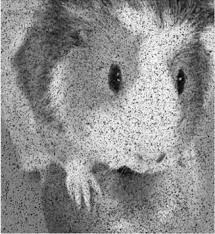

(234, 215)
width:   215
height:  234
7128187.0


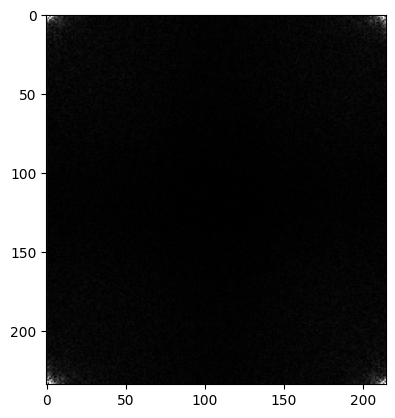

In [ ]:
def dft(x):
    """Calcula la Transformada de Fourier discreta de x"""
    N = len(x)
    X = [0] * N
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * cmath.exp(-2j * cmath.pi * k * n / N)
    return X

# Señal de prueba
x = [1, 2, 3, 4, 5, 6, 7, 8]

# Transformada de Fourier
X = dft(x)

# Imprimir los resultados
print("Señal de entrada: ", x)
print("Transformada de Fourier: ", X)

img = cv2.imread('/content/drive/MyDrive/Maestría en Ciencias de la Computación/Visión Artificial/animal.jpg', 0)
cv2_imshow(img)
print(img.shape)
h, w = img.shape
print('width:  ', w)
print('height: ', h)
resultado = []
for fila in range(h):
  resultado.append(dft(img[fila]))

resultado = np.transpose(resultado)

resultado2 = []
for fila in range(w):
  resultado2.append(dft(resultado[fila]))

resultado2 = np.transpose(resultado2)
resultado3 = []
for fila in range(h):
  temp = []
  resultado3.append(temp)
  for columna in range(w):
    resultado3[fila].append(abs(resultado2[fila][columna]))
print(resultado3[0][0])
np_resultado3 = np.array(resultado3)
norm = np.linalg.norm(np_resultado3)  
normalized_array = np_resultado3/norm
resultado3 = normalized_array.tolist()
for fila in range(h):
  for columna in range(w):
    temp = int(resultado3[fila][columna] * 8000)
    if temp > 255:
      resultado3[fila][columna] = 255
    else:
      resultado3[fila][columna] = temp

resultado_array = np.asarray(resultado3)
plt.imshow(resultado_array, cmap='gray')
plt.show()

In [ ]:
print(resultado3[20])

[9, 10, 4, 0, 1, 10, 7, 7, 6, 6, 0, 4, 8, 5, 1, 5, 1, 4, 3, 3, 2, 5, 2, 0, 1, 3, 4, 5, 3, 2, 2, 4, 2, 3, 5, 7, 7, 0, 2, 2, 2, 3, 4, 3, 4, 0, 1, 1, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 0, 2, 3, 1, 1, 0, 2, 2, 3, 1, 0, 1, 4, 2, 1, 2, 0, 2, 2, 3, 0, 1, 3, 2, 1, 3, 0, 0, 1, 0, 0, 3, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 3, 2, 1, 1, 2, 3, 3, 1, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 3, 1, 0, 3, 1, 4, 0, 0, 2, 1, 5, 2, 2, 4, 2, 1, 2, 2, 2, 1, 3, 7, 1, 3, 4, 3, 3, 1, 2, 3, 2, 1, 1, 2, 2, 3, 2, 6, 4, 1, 4, 0, 3, 2, 3, 3, 0, 0, 2, 3, 3, 5, 4, 4, 1, 4, 2, 1, 3, 2, 3, 3, 1, 1, 2, 0, 2, 5, 0, 5, 3, 4, 4, 5, 4, 6, 2, 4, 2, 3, 4, 2, 1, 5, 5, 2]
